<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Monte_Carlo_Candlestick_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas_ta

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import datetime as dt

In [3]:
mu = 0.05
sigma = 0.07
S0 = 100
days = 500

In [4]:
def plot_candle_sticks_macd(mu, sigma, S0, days):
    price_df = pd.DataFrame({
        'n' : np.arange(24 * 60 * days),
        'W' : np.cumsum(np.random.normal(size = 24 * 60 * days))
    })

    delta_t = 1.0/(365.0 * 24 * 60)
    mu_eff = mu - 0.5 * sigma ** 2

    price_df.eval('S = @S0 * exp(@mu_eff * (n * @delta_t) + @sigma * sqrt(@delta_t) * W)', inplace = True)

    candle_arr = price_df['S'].values.reshape([-1, 24 * 60])

    vol_noise = np.random.normal(size=days)
    open = candle_arr[:, 0]
    high = np.max(candle_arr, axis = 1, keepdims = False)
    low = np.min(candle_arr, axis = 1, keepdims = False)
    close = candle_arr[:, -1]
    volume = 1000 + 250 * (high - low) + 500 * (open - close)

    close_x_volume = close * volume
    vwap = np.cumsum(close_x_volume) / np.cumsum(volume)

    candlestick_df = pd.DataFrame({
        'Open' : open,
        'High' : high,
        'Low' : low,
        'Close' : close,
        'Volume' : volume,
        'VWAP' : vwap
    }, index = pd.date_range(start="2023-01-01", periods = days))

    # Step 2: Calculate technical indicators using pandas-ta
    indicators = pd.concat(
        [
            candlestick_df,
            candlestick_df.ta.supertrend(high = "High", low = "Low", close = "Close", length=10, multiplier=3),
            candlestick_df.ta.adx(high='High', low='Low', close='Close', length=14),
            candlestick_df.ta.macd(close="Close", fast=12, slow=26, signal=9),
            candlestick_df.ta.rsi(close="Close", length=14),
            candlestick_df.ta.obv(close="Close", volume="Volume")
        ],
        axis = 1
    )

    data_df = indicators
    display(data_df)

    plots = [
        mpf.make_addplot(data_df["VWAP"], color="black", label = 'VWAP'),
        mpf.make_addplot(data_df["SUPERTl_10_3.0"], color="green"),
        mpf.make_addplot(data_df["SUPERTs_10_3.0"], color="red"),
        mpf.make_addplot(data_df['OBV'], panel=1, color='blue', label='OBV'),
        mpf.make_addplot(data_df["MACD_12_26_9"], panel=2, color="blue", ylabel="MACD"),
        mpf.make_addplot(data_df["MACDs_12_26_9"], panel=2, color="orange"),
        mpf.make_addplot(
            data_df["MACDh_12_26_9"],
            type="bar",
            panel=2,
            color=["green" if val >= 0 else "red" for val in data_df["MACDh_12_26_9"]],
            alpha=0.5,
        ),
        mpf.make_addplot(data_df["RSI_14"], panel=3, color="purple", ylabel="RSI"),
        mpf.make_addplot(data_df['ADX_14'], panel=4, color='orange', ylabel='ADX'),
    ]

    mpf.plot(
        data_df,
        type="candle",  # Candlestick chart
        style="yahoo",  # Chart style
        addplot=plots,
        figscale = 4,
        volume = True,
        panel_ratios=(2, 1, 1, 1, 1)
    )

,Open,High,Low,Close,Volume,VWAP,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0,ADX_14,DMP_14,DMN_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,OBV
2023-01-01,99.972845,100.590443,99.906362,100.320759,997.063423,100.320759,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997.063423
2023-01-02,100.321820,100.420942,99.929604,100.295943,1135.772775,100.307544,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-138.709352
2023-01-03,100.308740,100.544539,100.173999,100.393171,1050.419733,100.335799,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911.710381
2023-01-04,100.415145,100.749469,100.251184,100.690868,986.710000,100.419817,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1898.420381
2023-01-05,100.699069,100.994594,100.452391,100.871165,1049.502938,100.510572,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2947.923319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,107.962670,107.991887,107.447472,107.708138,1263.369529,108.544866,107.035847,1,107.035847,NaN,20.783955,18.514732,21.346989,0.370780,-0.112308,0.483088,51.305886,-70689.807514
2024-05-11,107.691156,107.921611,107.396181,107.481673,1236.099168,108.542562,107.035847,1,107.035847,NaN,19.920106,17.289338,20.580229,0.298907,-0.147345,0.446252,47.068133,-71925.906682
2024-05-12,107.474940,107.525115,106.710705,107.228039,1327.053093,108.539511,107.035847,1,107.035847,NaN,20.403722,15.569292,26.906353,0.218957,-0.181836,0.400793,42.803900,-73252.959776
2024-05-13,107.235064,107.507544,107.058241,107.206790,1126.462925,108.536890,107.035847,1,107.035847,NaN,20.852794,14.700390,25.404744,0.152128,-0.198932,0.351060,42.456853,-74379.422700


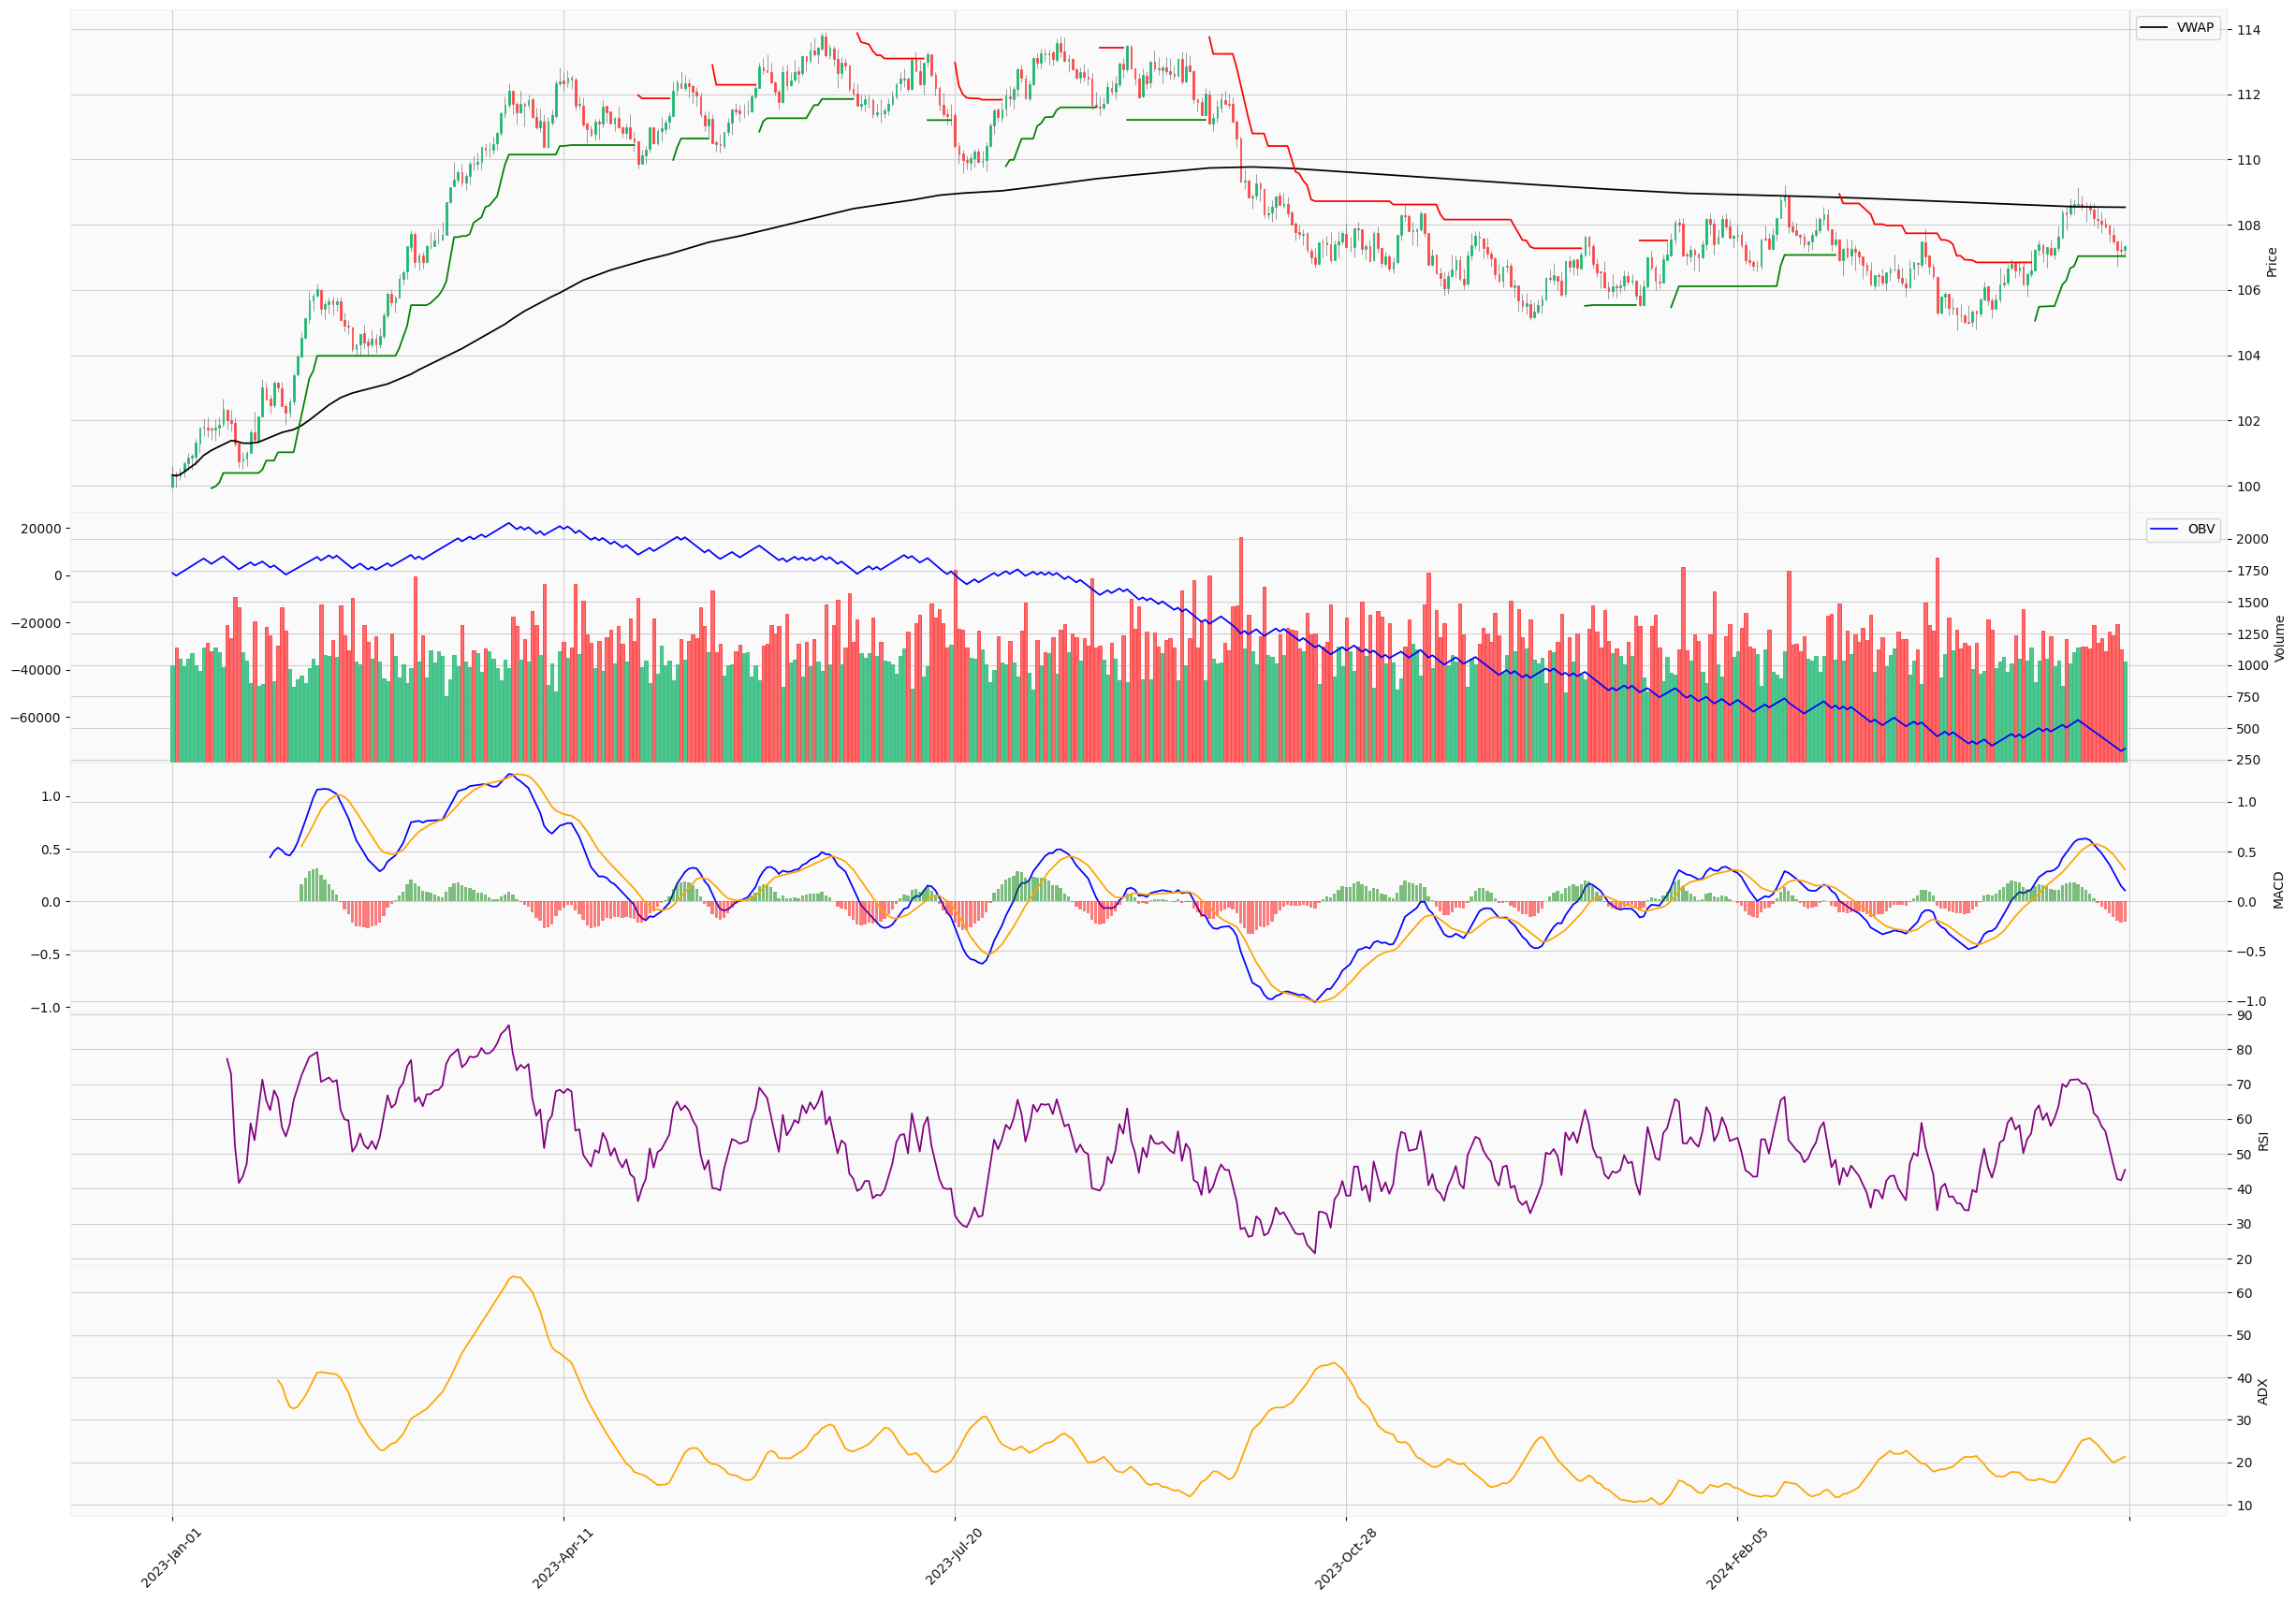

In [5]:
plot_candle_sticks_macd(mu, sigma, S0, days)